# Task 1: Clean the data
The goal of this task to reduce the noise in the original raw text by removing everything that does not bring information to the language model - everything that is not exactly text: html tags, math equations, urls, etc.

Finally We want to prepare the corpus and make it ready for our language model by tokenizing the text.



## 1. Load Data

In [1]:
# We only need the following librairies

import pandas as pd
import re
import string
import csv


Let's load the dataset and shuffle it.

In [ ]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
# Read the csv file in to a pandas dataframe
data = pd.read_csv('/content/gdrive/My Drive/Data/NLP/stackexchange_812k.csv.gz', 
                 compression='gzip', header=0, sep=',', quotechar='"').sample(frac=1,random_state=0).reset_index(drop=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812132 entries, 0 to 812131
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   post_id     812132 non-null  int64  
 1   parent_id   75535 non-null   float64
 2   comment_id  553076 non-null  float64
 3   text        812132 non-null  object 
 4   category    812132 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.0+ MB


## 2. Explore the dataset

In [4]:
data.head()

,post_id,parent_id,comment_id,text,category
0,291254,NaN,601672.0,The condition makes the gradient unbiased. (it...,comment
1,115372,NaN,221284.0,"Yes, that sounds fine to me.",comment
2,327356,NaN,NaN,<p>Consider gaussian variables belonging to a ...,post
3,186923,NaN,355055.0,Thanks S. Catterall. ^-^ Integrability: I knew...,comment
4,433143,NaN,NaN,Feature with very few extreme values,title


Find out how many categories of text

In [5]:
data.category.value_counts()

comment    553076
post       167304
title       91752
Name: category, dtype: int64

Find out the nature of text in the 3 categories - comment, post and title

In [7]:
# Examples of titles 
for txt in data[data.category == 'title'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
Meta Analysis: Pooling samples or determine an average effect size
--------------------------------------------------------------------------------
Can multivariate randomness be reduced to one dimensional randomness?
--------------------------------------------------------------------------------
Large differences between raw (plotted) data and least-squares means from mixed model


**This appears to be a normal alpha-numeric text**

In [8]:
# Examples of posts
for txt in data[data.category == 'post'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
<p>I am trying to learn EM Algorithm for Gaussian Mixture. But not able to understand few stuffs. This is what I have understood.</p>

<p>Consider GMM with k components.
$$ p( \mathbf{x}| \mathbf{\alpha_{k}},\mathbf{\mu},\mathbf{\Sigma})
 = \sum_{k=1}^K \alpha_{k}\mathcal{N}(\mathbf{x}|\mu_{k},\mathbf{\Sigma}_{k})$$</p>

<p>We have $N$ data points which constitute $\mathbf{x}$ and we have to find $\mathbf{\alpha_{k}},\mathbf{\mu},\mathbf{\Sigma}$ using EM algo.</p>

<p>So we assume some value for $\mathbf{\alpha_{k}},\mathbf{\mu},\mathbf{\Sigma}$ and calculate classification probability $w_{ik}$ for each data point to each Gaussian
$$w_{ik} = \dfrac{ \alpha_{k}\mathcal{N}(\mathbf{x}|\mu_{k},\mathbf{\Sigma}_{k})}{ \sum_{k=1}^K \alpha_{k}\mathcal{N}(\mathbf{x}|\mu_{k},\mathbf{\Sigma}_{k})}$$
So you get a $\mathbf{W}$ of size $N \times K$ This is considered as the E step.</p>

<p>Now new parameter values are 

**We see that text in post have html tags and latex formatted equations**

In [11]:
# And here's a sample of comments
for txt in data[data.category == 'comment'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
Take a look at the circular package. It has several plots that may help you, and also some nice functions.
--------------------------------------------------------------------------------
@GermanDemidov I disagree with your points here. One can easily calibrate the T-test when the distribution is small and non-normal, even multimodal (use simulation). It's easy to show the type-1 error rate is conserved and that the test has some power. At any rate, a jackknife could be recommended as an alternative. The important point is coding LLD values as 0 when they are positively valued.
--------------------------------------------------------------------------------
@TenaliRaman That is not true. I studied on Casella Berger and on chapter 4, par 4.4, page 162-165 they explicitly talks about Hierarchical Model and Mixture distribution. " .. $X$ is said to have a mixture distribution if the distribution of $X$ depend

**While most of this is normal text - some mentions (@username) are visible**

## 3. Clean up raw text
We're going to remove the following elements:
* html tags
* line returns
* urls
* latex equations
* numbers
* mentions: @someone
* digits
* most of the punctuation
* and extra spaces

For that we will use a series of simple regex patterns and the following pandas dataframe pattern:

```
pattern = r" some regex pattern"
df.text.apply(lambda t : re.sub(pattern,' ', txt) )
```


Note that the regex patterns used here are chosen for their simplicity. Feel free to use more precise patterns.  

In [12]:
# remove html tags
data['text'] = data.text.apply(lambda txt : re.sub(r"<[^>]*>",' ', txt) )

In [13]:
# remove line returns
data['text'] = data.text.apply(lambda txt : re.sub(r"[\r\n]+",' ', txt) )


In [14]:
# remove urls
data['text'] = data.text.apply(lambda txt : re.sub(r'http.?://[^\s]+[\s]?', ' ', txt) )


In [15]:
# remove mentions
data['text'] = data.text.apply(lambda txt : re.sub(r"@\S+",' ', txt) )


In [16]:
# remove latex
data['text'] = data.text.apply(lambda txt : re.sub(r"\$[^>]*\$",' ', txt) )


In [17]:
# remove digits
data['text'] = data.text.apply(lambda txt : re.sub(r"\d+",' ', txt) )


In [18]:
# remove some of the punctuation but keep ,.!? and -
remove = '"#$%&()*+/:;<=>@[\\]^_`{|}~”“'
pattern = r"[{}]".format(remove)
data['text'] = data.text.apply(lambda txt : re.sub(pattern,' ', txt) )


In [19]:
# remove multiple spaces
data['text'] = data.text.apply(lambda txt : re.sub(r"\s\s+",' ', txt) )


In [20]:
# finally remove trailing spaces with strip()
data['text'] = data.text.apply(lambda txt : txt.strip() )


Let's check out the resulting text for the different types:

In [21]:
# titles should not be changed
for txt in data[data.category == 'title'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
How to calculate 'times likely' for a percentage and whole number data set?
--------------------------------------------------------------------------------
Logistic regression with an independent variable that only applies to a subset
--------------------------------------------------------------------------------
Why we always put log before the joint pdf when we use MLE Maximum likelihood Estimation ?


In [25]:
# posts should have much less clutter
for txt in data[data.category == 'post'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
A little late but still can help some. I tested on almost the same sample as you, I just tested with only selected variable max depth library h o data iris h o.init iris Species We obtain a distribution of each node other virginica Then the relative importance from h o is based on the following calculation \begin align RelativeImportance amp \frac - \frac \frac amp . \end align Same result with H O h o.varimp rf Variable Importances variable relative importance scaled importance percentage Petal.Width . . . Sepal.Length . . . Sepal.Width . . . Petal.Length . . . The relative importance of a variable as a general is certainly the sum of the previous function applied on each node where the variable is used. I don't know how to interpret the function used, if someone can, it will be with pleasure. Hope it helped!
--------------------------------------------------------------------------------
For a data set w

In [28]:
# comments should also be less noisy
for txt in data[data.category == 'comment'].text.sample(3).values:
  print('-' * 80)
  print(txt)

--------------------------------------------------------------------------------
I took a quick glance at the GSL documentation and based on what it offers I would presume it cannot do anything like what you ask. It may be worth remarking that what you are attempting is unusual and might be inferior to other procedures. Perhaps you might like to consider modifying your post describe your data and what you would like to learn from them, then let readers suggest appropriate procedures.
--------------------------------------------------------------------------------
I don't get what you mean by companion functions. The problem can be solved by inverting the transformations, finding the joint support of your new random variables and multiplying by the Jacobian.
--------------------------------------------------------------------------------
I think that in ANOVA-type interaction diagrams the estimated marginal means would be plotted. These are equivalent to the means of the predicted condi

## 4. Tokenize

Let's tokenize the text. 
This will allow us to count the number of tokens of each text and subsequently remove test that are too long or too short.
You can use other librairies to tokenize the text (spacy for instance) or other tokenizer. Here we use the [WordPunctTokenizer](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.regexp.WordPunctTokenizer) from NLTK.

And we create a new columns called tokens




In [29]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
data['tokens'] = data.text.apply(lambda t : tokenizer.tokenize(t.lower())) 


Let's now count the tokens in each piece of text


In [30]:
data['n_tokens'] = data.tokens.apply(len)

In [31]:
data.n_tokens.describe()

count    812132.000000
mean         60.074291
std          99.416095
min           0.000000
25%          16.000000
50%          35.000000
75%          70.000000
max       10874.000000
Name: n_tokens, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

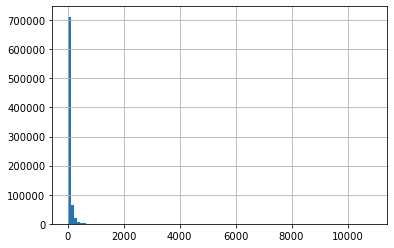

In [32]:
data.n_tokens.hist(bins = 100)

**We notice that there are some extremely long texts. Let's look at the largest one**

In [33]:
# this one has a very long series of "L,"
print(data[data.n_tokens > 10000].text.values[0])

My sample includes subjects, of which belong to group L , while the other to group L please see data below . I used GLM for a binary outcome to test for group differences in background variables - summary pre lt - glm L g a m p e, family binomial logit , data df ...yielding significant differences for of them g, a, m, p, and e . So I modeled these background variables as covariates when testing for an association between my predictor, chr and my outcome rsk , in each one of the groups L , L , again using GLM for binary outcome summary fit lt - glm rsk chr g a m p e, family binomial logit , data df which df L , The results showed that a significant association does exist for L but not for L . I would appreciate your help in how to test whether significance non-significance can be attributed to the group condition? . Or in other words, is it true that for subjects L , a significant correlation is evident, while for L ' it's absent. Thanks for responders! Uri structure list L c , , , , , 

We can see that most of the longest texts are composed of tables with limited semantic value. 
We will remove rows that have more than an arbitrary number of tokens (let's say 5000) as well as rows that have too few tokens.

In [34]:
data = data[(data.n_tokens > 4) & (data.n_tokens < 5000)].reset_index(drop = True)
data.shape

(789649, 7)

In [35]:
data.category.value_counts()

comment    540587
post       165377
title       83685
Name: category, dtype: int64

## 5. Export data
We could export the dataframe as such using a pickle file format. 

However if we want to keep the original csv format it's going to be easier if we transform the list of tokens into a space separated string.

On retrieval we will only have to split the string to get back the list of tokens.

In [36]:
data['tokens'] = data.tokens.apply(lambda tk : ' '.join(tk))
data.tokens.head()

0    the condition makes the gradient unbiased . it...
1                       yes , that sounds fine to me .
2    consider gaussian variables belonging to a gau...
3    thanks s . catterall . - integrability i knew ...
4                 feature with very few extreme values
Name: tokens, dtype: object

And finally let's export the dataframe into a csv file.
We will use that csv file as the new cleaned up and filtered out dataset to build our language model in task 2.


In [37]:
data.to_csv('/content/gdrive/My Drive/Data/NLP//stackexchange_812k_v2.csv', quoting = csv.QUOTE_ALL, index = False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/Data/NLP//stackexchange_812k_v2.csv'

# Conclusion
Removing or adding steps to this first text processing task will allow us to test different approaches in our language model building process.

For instance we can decide not to remove the latex formatted mathematical equation and see if the language model is able to create grammatically valid equations. 

We could also implement a step to handle contractions (i'm, let's, ...) and see if that improves the quality of the generated text

Finally we could also decide to work on the vocabulary and filter out typos or non-English unknown words using named entity recognition to tag specific tokens.


